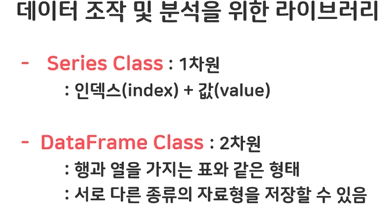

In [1]:
import pandas as pd

## 학습목표
- 데이터분석 프로세스를 이해할수있다
- pandas 라는 라이브러리를 이해할수있다

### pandas
- 행과 열을 가지는 데이터를 다룰떄 사용하는 라이브러리
- pandas 데이터
    - Series : 1차원 데이터 구조 
    - DataFrame: 2차원 데이터 구조 

In [6]:
#Series 생성

student=pd.Series(['박근범','지서영','박기준','박은수','기태형'])
student

0    박근범
1    지서영
2    박기준
3    박은수
4    기태형
dtype: object

In [7]:
#인덱스 번호를 지정하여 Series 생성 
student=pd.Series(['박근범','지서영','박기준','박은수','기태형'],index=[420,421,422,412,413])
student

420    박근범
421    지서영
422    박기준
412    박은수
413    기태형
dtype: object

In [8]:
print(student)

420    박근범
421    지서영
422    박기준
412    박은수
413    기태형
dtype: object


### Series 연산

In [10]:
#딕셔너리 활용후 Series 선언가능 
# key :index value:value 로 구성
data={'꼬부기':1256,'이브이':2542,'아르세우스':9585,'치코리타':100}
pokemon=pd.Series(data)
pokemon

꼬부기      1256
이브이      2542
아르세우스    9585
치코리타      100
dtype: int64

In [12]:
# 레벌업 버전 포켓몬
data2={'꼬부기':1500,'이브이':3000,'마자용':200,'아르세우스':10000}
pokemon_up=pd.Series(data2)
pokemon_up

꼬부기       1500
이브이       3000
마자용        200
아르세우스    10000
dtype: int64

In [14]:
result=pokemon_up-pokemon
result

꼬부기      244.0
마자용        NaN
아르세우스    415.0
이브이      458.0
치코리타       NaN
dtype: float64

- 결측치 처리 방법

In [19]:
#확인 
#변수명.isnull() -> 결과는 논리형으로 출력 
result.isnull()

꼬부기      False
마자용       True
아르세우스    False
이브이      False
치코리타      True
dtype: bool

In [21]:
result[result.isnull()]

마자용    NaN
치코리타   NaN
dtype: float64

In [23]:
result[result.notnull()]

꼬부기      244.0
아르세우스    415.0
이브이      458.0
dtype: float64

In [26]:
#데이터 업데이트
result['마자용']=20
result

꼬부기      244.0
마자용       20.0
아르세우스    415.0
이브이      458.0
치코리타       NaN
dtype: float64

In [28]:
#데이터 추가 -> 미뇽 150 결과 추가
result['미뇽']=150
result

꼬부기      244.0
마자용       20.0
아르세우스    415.0
이브이      458.0
치코리타       NaN
미뇽       150.0
dtype: float64

In [30]:
# 결측치를 찾아 특정값으로 변경 
#변수명.fillna(특정값 )
result=result.fillna(0)
result

꼬부기      244.0
마자용       20.0
아르세우스    415.0
이브이      458.0
치코리타       0.0
미뇽       150.0
dtype: float64

In [32]:
#데이터 삭제 
del result['치코리타']
result

꼬부기      244.0
마자용       20.0
아르세우스    415.0
이브이      458.0
미뇽       150.0
dtype: float64

### DataFrame 생성하기
 - 행과열을 가지는 2차원데이터 

In [39]:
team=pd.DataFrame([
    ['구상원','ESFJ'],['김소은','INTP'],['최보선','ISFP'],
    ['신현경','INTP'],['신윤지','ESTJ'],['장지석','INFJ']
    ],
    columns=['이름','mbti']
    , index=['001','002','003','004','005','006']            )
team

,이름,mbti
001,구상원,ESFJ
002,김소은,INTP
003,최보선,ISFP
004,신현경,INTP
005,신윤지,ESTJ
006,장지석,INFJ


In [40]:
team.T

,001,002,003,004,005,006
이름,구상원,김소은,최보선,신현경,신윤지,장지석
mbti,ESFJ,INTP,ISFP,INTP,ESTJ,INFJ


In [41]:
#딕셔너리 를 활용한 데이터 선언 
#key-> column ,value-> value 로 선언 
team_dict = {
    '이름': ['구상원', '김소은', '최보선', '신현경', '신윤지', '장지석'],
    'MBTI': ['ESFJ', 'INTP', 'ISFP', 'INTP', 'ESTJ', 'INFJ']
}

team = pd.DataFrame(
    team_dict,
    index=['001', '002', '003', '004', '005', '006']
)

team

,이름,MBTI
001,구상원,ESFJ
002,김소은,INTP
003,최보선,ISFP
004,신현경,INTP
005,신윤지,ESTJ
006,장지석,INFJ


In [42]:
#데이터 크기 확인
team.shape()#(행,열)


(6, 2)

In [44]:
#인덱스 확인 
team.index

Index(['001', '002', '003', '004', '005', '006'], dtype='object')

In [47]:
#컬럼 확인 
team.columns

Index(['이름', 'MBTI'], dtype='object')

In [48]:
#정보
team.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 001 to 006
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   이름      6 non-null      object
 1   MBTI    6 non-null      object
dtypes: object(2)
memory usage: 144.0+ bytes


- 데이터 로딩
  - csv 파일 열기
  - pd.read_csv('경로 ')

In [52]:
#한글이 들어있는 데이터는 인코딩 작업 필요
#인코딩 감지후 데이터 읽어오기 
import chardet # 인코딩 감지 라이브리리
with open(r'C:\Users\jyc68\LG_DX_school_code\data\hr-info.csv','rb') as f: # 파일 열기
    data = f.read() # 파일을 읽어서 변수 저장
chardet.detect(data) # 인코딩 분석

{'encoding': 'EUC-KR', 'confidence': 0.99, 'language': 'Korean'}

In [54]:
a= pd.read_csv(r'C:\Users\jyc68\LG_DX_school_code\data\hr-info.csv',encoding='euc-kr',index_col='EID')
#DataFrame 에서 컬럼중 하나를 인덱스로 설정하는 방법 -> index_col='컬럼명 '

In [57]:
#정보 확인
a.info()
#200명에 사람에 대한 19개의 열을  가지는 데이터
#컬럼명,데이터타입 ,결측치여부 확인가능 

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, E00206 to E00428
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ENAME               200 non-null    object 
 1   GENDER              200 non-null    object 
 2   ORG_CD              197 non-null    object 
 3   POS_CD              200 non-null    object 
 4   AGE                 200 non-null    int64  
 5   SERVICE_YEAR        200 non-null    int64  
 6   EDU_LEVEL           200 non-null    object 
 7   PERFORMANCE_SCORE   200 non-null    float64
 8   SALARY              200 non-null    int64  
 9   LAST_PROMO_DT       182 non-null    object 
 10  TRAINING_HOURS      200 non-null    int64  
 11  SKILLS              200 non-null    object 
 12  ACTIVE_STATE        200 non-null    object 
 13  HIRE_DATE           200 non-null    object 
 14  RETIRE_DATE         49 non-null     object 
 15  RETIRE_REASON       49 non-null     object 
 16  REHIR

In [61]:
#행 ,열 확인
a.shape
a.tail()#하위 다섯개 행만 확인
a.head()#상위 다섯개 행만 확인

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00322,부탐회,F,ORG014,P009,23,0,학사 학위,0.0,4500,NaN,4,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
E00389,초두반,F,ORG012,P009,23,0,학사 학위,0.0,4500,NaN,4,"Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N
E00438,권개득,M,ORG024,P009,23,0,학사 학위,0.0,4500,NaN,4,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
E00304,탐출조,M,ORG009,P009,24,0,학사 학위,0.0,4500,NaN,4,Salesforce,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
E00428,을충나,F,ORG003,P009,24,0,학사 학위,0.0,4500,NaN,4,"Data Analysis, Python, Marketing",Y,2024-09-01,NaN,NaN,NaN,KOREA,N


# 📊 인사 데이터 컬럼 설명

본 데이터셋은 총 **200명의 직원 인사 정보**를 포함하고 있으며,  
인적 사항, 조직 정보, 근무 이력, 성과·보상, 교육, 퇴직 이력 등  
전반적인 인사 관리 데이터를 다루고 있다.

---

## 🧑 기본 인적 정보

| 컬럼명 | 설명 |
|------|------|
| ENAME | 직원 이름 |
| GENDER | 성별 |
| AGE | 나이 |
| NATION | 국적 |

---

## 🏢 조직 및 직무 정보

| 컬럼명 | 설명 |
|------|------|
| ORG_CD | 소속 조직 코드 (일부 결측치 존재) |
| POS_CD | 직급 코드 |
| EDU_LEVEL | 최종 학력 수준 |

---

## 📅 근무 이력 및 재직 상태

| 컬럼명 | 설명 |
|------|------|
| HIRE_DATE | 입사일 |
| SERVICE_YEAR | 근속 연수 |
| ACTIVE_STATE | 재직 상태 (재직, 휴직, 퇴직 등) |
| LAST_PROMO_DT | 최근 승진일 (일부 결측치 존재) |

---

## 📈 성과 및 보상 정보

| 컬럼명 | 설명 |
|------|------|
| PERFORMANCE_SCORE | 성과 평가 점수 (float) |
| SALARY | 급여 |
| ROUNDING_DEDUCTION | 급여 반올림 또는 공제 여부 |

---

## 📚 교육 및 역량 정보

| 컬럼명 | 설명 |
|------|------|
| TRAINING_HOURS | 누적 교육 이수 시간 |
| SKILLS | 보유 기술 또는 역량 (문자열 형태) |

---

## 🚪 퇴직 및 재입사 정보  
※ 퇴직자에 한해 값이 존재하며, 재직자의 경우 결측치로 구성됨

| 컬럼명 | 설명 |
|------|------|
| RETIRE_DATE | 퇴직일 |
| RETIRE_REASON | 퇴직 사유 |
| REHIRE_YN | 재입사 여부 |

---

### 데이터 색인 기초 
- DataFrame 에서 데이터 추출 방법 

In [63]:
# 직원 이름 컬럼 추출
a['ENAME']

EID
E00206     시이오
E00181     나사장
E00164    난부사장
E00190     판라다
E00209     누훈봉
          ... 
E00322     부탐회
E00389     초두반
E00438     권개득
E00304     탐출조
E00428     을충나
Name: ENAME, Length: 200, dtype: object

In [65]:
# 직원이름 ,나이 추출

In [84]:
a[['ENAME','AGE']]

,ENAME,AGE
EID,,
E00206,시이오,49
E00181,나사장,49
E00164,난부사장,48
E00190,판라다,47
E00209,누훈봉,47
...,...,...
E00322,부탐회,23
E00389,초두반,23
E00438,권개득,23


In [85]:
a[['ENAME']] # 한개의 열 추출 DF형태로 추출할떈 대괄호 두개 

,ENAME
EID,
E00206,시이오
E00181,나사장
E00164,난부사장
E00190,판라다
E00209,누훈봉
...,...
E00322,부탐회
E00389,초두반
E00438,권개득


- 행 (index) 가져오기
  - 행단위 슬라이싱만 가능
  - 값 값추출

In [98]:
#EID가 E00206 가져오가
a['E00206':'E00206']

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,49,25,박사 학위,4.5,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y


In [100]:
a[0:1]

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,49,25,박사 학위,4.5,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y


- DataFrame 연산
  - 행단위 열단위 연산가능
  - 

In [107]:
#연봉 데이터 추출
(a["SALARY"]/12).round(2)


EID
E00206    850.00
E00181    791.67
E00164    758.33
E00190    708.33
E00209    716.67
           ...  
E00322    375.00
E00389    375.00
E00438    375.00
E00304    375.00
E00428    375.00
Name: SALARY, Length: 200, dtype: float64

In [112]:
#비교 연산
#연봉이 5000만원 이상이니?
print(a[a["SALARY"]>=5000])

       ENAME GENDER  ORG_CD POS_CD  AGE  SERVICE_YEAR EDU_LEVEL  \
EID                                                               
E00206   시이오      M     NaN   P001   49            25     박사 학위   
E00181   나사장      F     NaN   P002   49            24     박사 학위   
E00164  난부사장      M     NaN   P003   48            22     박사 학위   
E00190   판라다      F  ORG007   P004   47            18     박사 학위   
E00209   누훈봉      M  ORG023   P004   47            19     박사 학위   
...      ...    ...     ...    ...  ...           ...       ...   
E00460   춘란시      M  ORG023   P008   29             0     학사 학위   
E00468   다덕출      F  ORG028   P008   29             0     학사 학위   
E00469   리모루      M  ORG014   P008   29             0     학사 학위   
E00471   문예성      M  ORG013   P008   29             0     학사 학위   
E00484   개장영      F  ORG007   P008   29             0     학사 학위   

        PERFORMANCE_SCORE  SALARY LAST_PROMO_DT  TRAINING_HOURS  \
EID                                                          

In [120]:
a[a["SALARY"]>=5000]['ENAME']

EID
E00206     시이오
E00181     나사장
E00164    난부사장
E00190     판라다
E00209     누훈봉
          ... 
E00460     춘란시
E00468     다덕출
E00469     리모루
E00471     문예성
E00484     개장영
Name: ENAME, Length: 182, dtype: object

In [125]:
a[['ENAME',a["SALARY"]>=5000]]

TypeError: unhashable type: 'Series'

-문자열 변경 (DataFrame,Series 에 문자열 함수 적용 방법)

In [136]:
a['EDU_LEVEL']=a['EDU_LEVEL'].str.replace(' 학위','')

In [137]:
a['EDU_LEVEL']

EID
E00206    박사
E00181    박사
E00164    박사
E00190    박사
E00209    박사
          ..
E00322    학사
E00389    학사
E00438    학사
E00304    학사
E00428    학사
Name: EDU_LEVEL, Length: 200, dtype: object